## Processing with biomass data of other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['GS_cub_m'])

In [8]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [9]:
# Columns in "y" data collections
y.head()

,GS_cub_m
0,43.9
1,254.0
2,190.0
3,277.7
4,142.5


# Create first XGBoost model for estimate varibiality of output stats

In [10]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [11]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [12]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [13]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9586456251960583, 0.9740423632417412, 0.9710627581391928]
    Mean: 0.968
    Std: 0.007

 --------------------
Root-mean-square error (RMSE): 

    Scores: [22.46021418 28.40740821 27.02918695]
    Mean: 25.966
    Std: 2.542

 --------------------
Mean absolute error (MAE): 

    Scores: [15.545045585899086, 15.871869476024923, 18.760452767087703]
    Mean: 16.726
    Std: 1.445

 --------------------


# Add optimal hyperparameters for XGBoost model

In [14]:
# Hyperparameters data for the next step/stage
p1 = 0.8829191872975016               # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.4317747333990657               # gamma
print('Gamma: ' + str(p2))

p3 = 0.17029218845451208              # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 172         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.894854733579894            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8829191872975016
Gamma: 0.4317747333990657
Learning_rate: 0.17029218845451208
Max_depth: 4
N_estimators: 172
Subsample: 0.894854733579894


# Estimation of a basic XGBoost model using Loops

In [15]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [16]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(20):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:222.25108	validation_1-rmse:243.30140
[1]	validation_0-rmse:186.92428	validation_1-rmse:205.70728
[2]	validation_0-rmse:157.12587	validation_1-rmse:174.20615
[3]	validation_0-rmse:132.23973	validation_1-rmse:147.93616
[4]	validation_0-rmse:111.60308	validation_1-rmse:126.44373
[5]	validation_0-rmse:94.28996	validation_1-rmse:108.23646
[6]	validation_0-rmse:79.96452	validation_1-rmse:93.85191
[7]	validation_0-rmse:68.08040	validation_1-rmse:82.02584


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:58.65276	validation_1-rmse:72.58010
[9]	validation_0-rmse:50.60930	validation_1-rmse:64.36625
[10]	validation_0-rmse:43.97757	validation_1-rmse:57.60032
[11]	validation_0-rmse:38.54244	validation_1-rmse:52.49391
[12]	validation_0-rmse:34.25581	validation_1-rmse:48.58768
[13]	validation_0-rmse:30.74876	validation_1-rmse:45.37204
[14]	validation_0-rmse:27.73548	validation_1-rmse:42.65065
[15]	validation_0-rmse:25.48828	validation_1-rmse:40.51200
[16]	validation_0-rmse:23.78599	validation_1-rmse:39.04815
[17]	validation_0-rmse:22.34719	validation_1-rmse:37.67841
[18]	validation_0-rmse:21.12221	validation_1-rmse:36.52537
[19]	validation_0-rmse:20.25356	validation_1-rmse:35.68123
[20]	validation_0-rmse:19.53854	validation_1-rmse:34.84640
[21]	validation_0-rmse:18.88029	validation_1-rmse:34.09679
[22]	validation_0-rmse:18.34957	validation_1-rmse:33.68282
[23]	validation_0-rmse:17.88295	validation_1-rmse:33.06709
[24]	validation_0-rmse:17.60181	validation_1-rmse:32.56560

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.00507	validation_1-rmse:227.91868
[1]	validation_0-rmse:190.60943	validation_1-rmse:191.51263


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.02902	validation_1-rmse:161.54087
[3]	validation_0-rmse:134.62543	validation_1-rmse:136.90382
[4]	validation_0-rmse:113.64558	validation_1-rmse:116.07680
[5]	validation_0-rmse:96.04273	validation_1-rmse:98.17439
[6]	validation_0-rmse:81.36335	validation_1-rmse:84.13472
[7]	validation_0-rmse:69.15052	validation_1-rmse:72.56928
[8]	validation_0-rmse:59.77704	validation_1-rmse:63.31082
[9]	validation_0-rmse:51.60988	validation_1-rmse:55.83845
[10]	validation_0-rmse:44.74179	validation_1-rmse:49.95238
[11]	validation_0-rmse:39.22652	validation_1-rmse:45.39933
[12]	validation_0-rmse:35.01402	validation_1-rmse:41.31006
[13]	validation_0-rmse:31.39523	validation_1-rmse:38.64584
[14]	validation_0-rmse:28.50472	validation_1-rmse:36.19476
[15]	validation_0-rmse:26.25525	validation_1-rmse:34.59721
[16]	validation_0-rmse:24.41508	validation_1-rmse:33.39494
[17]	validation_0-rmse:22.91978	validation_1-rmse:31.96852
[18]	validation_0-rmse:21.85678	validation_1-rmse:31.20195

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.50053	validation_1-rmse:244.96627
[1]	validation_0-rmse:187.28130	validation_1-rmse:209.51732
[2]	validation_0-rmse:157.60589	validation_1-rmse:176.74275
[3]	validation_0-rmse:132.68970	validation_1-rmse:149.93093
[4]	validation_0-rmse:112.14178	validation_1-rmse:128.32823
[5]	validation_0-rmse:94.61834	validation_1-rmse:109.52992
[6]	validation_0-rmse:80.38101	validation_1-rmse:94.28425
[7]	validation_0-rmse:68.56659	validation_1-rmse:81.53936


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:59.34905	validation_1-rmse:72.34158
[9]	validation_0-rmse:51.33957	validation_1-rmse:64.32710
[10]	validation_0-rmse:44.64987	validation_1-rmse:57.41635
[11]	validation_0-rmse:39.24804	validation_1-rmse:52.20884
[12]	validation_0-rmse:35.00008	validation_1-rmse:48.03502
[13]	validation_0-rmse:31.44317	validation_1-rmse:44.87132
[14]	validation_0-rmse:28.62606	validation_1-rmse:42.62871
[15]	validation_0-rmse:26.35249	validation_1-rmse:40.78821
[16]	validation_0-rmse:24.62298	validation_1-rmse:39.09783
[17]	validation_0-rmse:23.14705	validation_1-rmse:37.95628
[18]	validation_0-rmse:22.07182	validation_1-rmse:37.10643
[19]	validation_0-rmse:21.07982	validation_1-rmse:36.64712
[20]	validation_0-rmse:20.30397	validation_1-rmse:36.33238
[21]	validation_0-rmse:19.62959	validation_1-rmse:36.14739
[22]	validation_0-rmse:19.16652	validation_1-rmse:35.92270
[23]	validation_0-rmse:18.76903	validation_1-rmse:35.70112
[24]	validation_0-rmse:18.42266	validation_1-rmse:35.53139

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.66592	validation_1-rmse:232.74959


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.42130	validation_1-rmse:197.18709
[2]	validation_0-rmse:159.15062	validation_1-rmse:166.11540
[3]	validation_0-rmse:133.94872	validation_1-rmse:139.70818
[4]	validation_0-rmse:113.08416	validation_1-rmse:118.60160
[5]	validation_0-rmse:95.77175	validation_1-rmse:101.09341
[6]	validation_0-rmse:81.33479	validation_1-rmse:86.58907
[7]	validation_0-rmse:69.26011	validation_1-rmse:74.64793
[8]	validation_0-rmse:60.00393	validation_1-rmse:65.98041
[9]	validation_0-rmse:51.83402	validation_1-rmse:57.65904
[10]	validation_0-rmse:45.00928	validation_1-rmse:50.69575
[11]	validation_0-rmse:39.64958	validation_1-rmse:45.61335
[12]	validation_0-rmse:35.67002	validation_1-rmse:42.04738
[13]	validation_0-rmse:31.97081	validation_1-rmse:38.52727
[14]	validation_0-rmse:29.03592	validation_1-rmse:36.07923
[15]	validation_0-rmse:26.71427	validation_1-rmse:33.82690
[16]	validation_0-rmse:24.86926	validation_1-rmse:32.10011
[17]	validation_0-rmse:23.48151	validation_1-rmse:30.944

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:227.68995	validation_1-rmse:220.86207
[1]	validation_0-rmse:191.80957	validation_1-rmse:188.37423
[2]	validation_0-rmse:161.16067	validation_1-rmse:160.65163
[3]	validation_0-rmse:135.59906	validation_1-rmse:136.37013
[4]	validation_0-rmse:114.59915	validation_1-rmse:116.63070
[5]	validation_0-rmse:96.94254	validation_1-rmse:99.33643
[6]	validation_0-rmse:82.28270	validation_1-rmse:85.35592
[7]	validation_0-rmse:70.36827	validation_1-rmse:73.96055


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:60.90325	validation_1-rmse:65.05764
[9]	validation_0-rmse:52.63603	validation_1-rmse:56.95475
[10]	validation_0-rmse:45.91807	validation_1-rmse:50.91498
[11]	validation_0-rmse:40.41189	validation_1-rmse:45.82025
[12]	validation_0-rmse:36.13128	validation_1-rmse:41.92618
[13]	validation_0-rmse:32.57946	validation_1-rmse:38.48397
[14]	validation_0-rmse:29.75856	validation_1-rmse:35.54489
[15]	validation_0-rmse:27.38238	validation_1-rmse:32.91845
[16]	validation_0-rmse:25.48899	validation_1-rmse:30.69745
[17]	validation_0-rmse:24.00102	validation_1-rmse:29.12403
[18]	validation_0-rmse:22.86174	validation_1-rmse:28.09548
[19]	validation_0-rmse:21.82790	validation_1-rmse:27.12838
[20]	validation_0-rmse:21.02591	validation_1-rmse:26.14233
[21]	validation_0-rmse:20.37186	validation_1-rmse:25.62403
[22]	validation_0-rmse:19.83872	validation_1-rmse:25.15068
[23]	validation_0-rmse:19.37440	validation_1-rmse:24.39919
[24]	validation_0-rmse:18.95289	validation_1-rmse:24.13056

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.08761	validation_1-rmse:219.36317
[1]	validation_0-rmse:192.63747	validation_1-rmse:184.57076
[2]	validation_0-rmse:161.90023	validation_1-rmse:154.54166
[3]	validation_0-rmse:136.02625	validation_1-rmse:129.05039
[4]	validation_0-rmse:114.91358	validation_1-rmse:108.45324
[5]	validation_0-rmse:97.28184	validation_1-rmse:91.75240


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:82.67889	validation_1-rmse:78.15039
[7]	validation_0-rmse:70.50131	validation_1-rmse:66.67512
[8]	validation_0-rmse:60.97494	validation_1-rmse:58.01387
[9]	validation_0-rmse:52.75659	validation_1-rmse:50.55945
[10]	validation_0-rmse:46.02793	validation_1-rmse:44.57554
[11]	validation_0-rmse:40.40630	validation_1-rmse:39.69800
[12]	validation_0-rmse:36.00391	validation_1-rmse:35.94339
[13]	validation_0-rmse:32.27858	validation_1-rmse:32.99750
[14]	validation_0-rmse:29.44808	validation_1-rmse:30.95108
[15]	validation_0-rmse:27.02040	validation_1-rmse:29.46945
[16]	validation_0-rmse:25.11257	validation_1-rmse:28.10935
[17]	validation_0-rmse:23.63903	validation_1-rmse:27.31603
[18]	validation_0-rmse:22.42500	validation_1-rmse:26.77026
[19]	validation_0-rmse:21.46264	validation_1-rmse:26.15042
[20]	validation_0-rmse:20.60297	validation_1-rmse:25.77295
[21]	validation_0-rmse:19.85708	validation_1-rmse:25.33977
[22]	validation_0-rmse:19.34144	validation_1-rmse:25.10283
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.17148	validation_1-rmse:216.36850
[1]	validation_0-rmse:193.36734	validation_1-rmse:182.36194
[2]	validation_0-rmse:162.19256	validation_1-rmse:154.21485
[3]	validation_0-rmse:136.31750	validation_1-rmse:131.35878
[4]	validation_0-rmse:115.42740	validation_1-rmse:112.77633
[5]	validation_0-rmse:97.40859	validation_1-rmse:96.94925


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:82.74064	validation_1-rmse:83.99946
[7]	validation_0-rmse:70.58607	validation_1-rmse:73.32454
[8]	validation_0-rmse:60.93506	validation_1-rmse:64.83433
[9]	validation_0-rmse:52.52625	validation_1-rmse:57.96917
[10]	validation_0-rmse:45.60455	validation_1-rmse:52.74515
[11]	validation_0-rmse:40.00862	validation_1-rmse:48.37087
[12]	validation_0-rmse:35.81056	validation_1-rmse:44.91981
[13]	validation_0-rmse:32.04920	validation_1-rmse:42.09872
[14]	validation_0-rmse:29.05808	validation_1-rmse:39.84012
[15]	validation_0-rmse:26.77614	validation_1-rmse:38.20402
[16]	validation_0-rmse:24.88359	validation_1-rmse:36.88449
[17]	validation_0-rmse:23.42440	validation_1-rmse:35.95399
[18]	validation_0-rmse:22.29688	validation_1-rmse:35.20877
[19]	validation_0-rmse:21.34078	validation_1-rmse:34.42936
[20]	validation_0-rmse:20.61287	validation_1-rmse:33.86253
[21]	validation_0-rmse:19.99103	validation_1-rmse:33.38021
[22]	validation_0-rmse:19.42512	validation_1-rmse:32.98559
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.25237	validation_1-rmse:235.70152
[1]	validation_0-rmse:189.14865	validation_1-rmse:201.45591
[2]	validation_0-rmse:158.75762	validation_1-rmse:170.55562
[3]	validation_0-rmse:133.45994	validation_1-rmse:145.02130
[4]	validation_0-rmse:112.80877	validation_1-rmse:125.05387


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.35097	validation_1-rmse:107.27771
[6]	validation_0-rmse:81.11367	validation_1-rmse:93.10342
[7]	validation_0-rmse:69.29961	validation_1-rmse:81.39356
[8]	validation_0-rmse:60.04939	validation_1-rmse:72.49112
[9]	validation_0-rmse:52.08274	validation_1-rmse:64.67034
[10]	validation_0-rmse:45.48964	validation_1-rmse:57.72736
[11]	validation_0-rmse:40.07992	validation_1-rmse:52.38967
[12]	validation_0-rmse:35.84911	validation_1-rmse:48.02062
[13]	validation_0-rmse:32.14963	validation_1-rmse:44.23914
[14]	validation_0-rmse:29.38853	validation_1-rmse:41.43673
[15]	validation_0-rmse:27.01424	validation_1-rmse:38.94429
[16]	validation_0-rmse:25.14809	validation_1-rmse:36.83817
[17]	validation_0-rmse:23.64565	validation_1-rmse:35.26035
[18]	validation_0-rmse:22.46354	validation_1-rmse:34.41871
[19]	validation_0-rmse:21.45373	validation_1-rmse:33.44475
[20]	validation_0-rmse:20.59363	validation_1-rmse:32.58304
[21]	validation_0-rmse:20.01213	validation_1-rmse:31.92610
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.98230	validation_1-rmse:213.59174


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:193.45774	validation_1-rmse:178.61539
[2]	validation_0-rmse:162.44871	validation_1-rmse:149.67028
[3]	validation_0-rmse:136.77711	validation_1-rmse:125.16478
[4]	validation_0-rmse:115.46843	validation_1-rmse:105.59816
[5]	validation_0-rmse:97.56407	validation_1-rmse:89.46787
[6]	validation_0-rmse:82.78098	validation_1-rmse:76.45396
[7]	validation_0-rmse:70.72029	validation_1-rmse:66.01473
[8]	validation_0-rmse:61.04400	validation_1-rmse:57.96006
[9]	validation_0-rmse:52.63786	validation_1-rmse:51.11456
[10]	validation_0-rmse:45.77597	validation_1-rmse:46.12720
[11]	validation_0-rmse:40.18683	validation_1-rmse:41.92992
[12]	validation_0-rmse:35.76393	validation_1-rmse:38.93349
[13]	validation_0-rmse:31.92567	validation_1-rmse:36.31500
[14]	validation_0-rmse:28.95651	validation_1-rmse:35.02578
[15]	validation_0-rmse:26.64167	validation_1-rmse:33.47784
[16]	validation_0-rmse:24.72410	validation_1-rmse:32.30859
[17]	validation_0-rmse:23.18096	validation_1-rmse:31.3619

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.36351	validation_1-rmse:218.78631
[1]	validation_0-rmse:192.84823	validation_1-rmse:186.44179
[2]	validation_0-rmse:161.86037	validation_1-rmse:156.48162
[3]	validation_0-rmse:136.29492	validation_1-rmse:132.55710
[4]	validation_0-rmse:115.31474	validation_1-rmse:113.38041
[5]	validation_0-rmse:97.43672	validation_1-rmse:97.07559
[6]	validation_0-rmse:82.62466	validation_1-rmse:83.12656
[7]	validation_0-rmse:70.39579	validation_1-rmse:71.95488
[8]	validation_0-rmse:60.78511	validation_1-rmse:63.43751
[9]	validation_0-rmse:52.49671	validation_1-rmse:55.60354
[10]	validation_0-rmse:45.69993	validation_1-rmse:49.41787
[11]	validation_0-rmse:40.13994	validation_1-rmse:44.45884
[12]	validation_0-rmse:35.91184	validation_1-rmse:40.87336
[13]	validation_0-rmse:32.17012	validation_1-rmse:37.49705
[14]	validation_0-rmse:29.10259	validation_1-rmse:34.92187
[15]	validation_0-rmse:26.71734	validation_1-rmse:32.62092
[16]	validation_0-rmse:24.84491	validation_1-rmse:31.166

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.49240	validation_1-rmse:225.69325


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.70450	validation_1-rmse:191.00888
[2]	validation_0-rmse:160.23666	validation_1-rmse:161.18904
[3]	validation_0-rmse:134.68715	validation_1-rmse:136.51376
[4]	validation_0-rmse:113.80334	validation_1-rmse:115.57636
[5]	validation_0-rmse:96.18577	validation_1-rmse:98.58105
[6]	validation_0-rmse:81.59856	validation_1-rmse:84.60647
[7]	validation_0-rmse:69.64971	validation_1-rmse:72.65021
[8]	validation_0-rmse:60.11089	validation_1-rmse:63.31643
[9]	validation_0-rmse:51.89605	validation_1-rmse:55.14297
[10]	validation_0-rmse:45.18228	validation_1-rmse:48.88202
[11]	validation_0-rmse:39.72012	validation_1-rmse:43.80118
[12]	validation_0-rmse:35.47181	validation_1-rmse:39.76278
[13]	validation_0-rmse:31.72600	validation_1-rmse:36.27070
[14]	validation_0-rmse:28.90177	validation_1-rmse:33.53581
[15]	validation_0-rmse:26.62124	validation_1-rmse:31.56204
[16]	validation_0-rmse:24.76224	validation_1-rmse:29.36626
[17]	validation_0-rmse:23.22472	validation_1-rmse:27.8516

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.09957	validation_1-rmse:234.49993
[1]	validation_0-rmse:189.62746	validation_1-rmse:199.21272
[2]	validation_0-rmse:159.43927	validation_1-rmse:168.62616
[3]	validation_0-rmse:134.27687	validation_1-rmse:143.53752
[4]	validation_0-rmse:113.24064	validation_1-rmse:122.06653
[5]	validation_0-rmse:95.71076	validation_1-rmse:104.50126
[6]	validation_0-rmse:81.35967	validation_1-rmse:89.29502
[7]	validation_0-rmse:69.40065	validation_1-rmse:77.76333
[8]	validation_0-rmse:60.11115	validation_1-rmse:68.85828
[9]	validation_0-rmse:51.91069	validation_1-rmse:60.37920
[10]	validation_0-rmse:45.24086	validation_1-rmse:53.70572


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:39.79873	validation_1-rmse:48.06975
[12]	validation_0-rmse:35.63286	validation_1-rmse:44.51678
[13]	validation_0-rmse:31.97608	validation_1-rmse:40.77966
[14]	validation_0-rmse:29.08841	validation_1-rmse:37.85408
[15]	validation_0-rmse:26.69592	validation_1-rmse:35.53017
[16]	validation_0-rmse:24.85240	validation_1-rmse:34.01710
[17]	validation_0-rmse:23.42990	validation_1-rmse:32.72593
[18]	validation_0-rmse:22.41313	validation_1-rmse:31.86658
[19]	validation_0-rmse:21.38440	validation_1-rmse:30.76346
[20]	validation_0-rmse:20.61972	validation_1-rmse:29.83529
[21]	validation_0-rmse:20.07462	validation_1-rmse:29.30952
[22]	validation_0-rmse:19.60610	validation_1-rmse:28.73951
[23]	validation_0-rmse:18.99766	validation_1-rmse:28.47839
[24]	validation_0-rmse:18.60454	validation_1-rmse:28.28265
[25]	validation_0-rmse:18.25487	validation_1-rmse:28.02195
[26]	validation_0-rmse:17.87600	validation_1-rmse:27.55076
[27]	validation_0-rmse:17.57415	validation_1-rmse:27.279

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.43475	validation_1-rmse:235.43022
[1]	validation_0-rmse:189.35849	validation_1-rmse:201.27348
[2]	validation_0-rmse:158.85164	validation_1-rmse:170.42292
[3]	validation_0-rmse:133.94712	validation_1-rmse:145.74197
[4]	validation_0-rmse:113.05601	validation_1-rmse:124.19472
[5]	validation_0-rmse:95.65634	validation_1-rmse:106.48397
[6]	validation_0-rmse:81.26406	validation_1-rmse:91.64112
[7]	validation_0-rmse:69.39470	validation_1-rmse:79.70862
[8]	validation_0-rmse:60.08691	validation_1-rmse:70.90986
[9]	validation_0-rmse:51.95494	validation_1-rmse:62.56893
[10]	validation_0-rmse:45.37102	validation_1-rmse:56.21179
[11]	validation_0-rmse:40.01396	validation_1-rmse:50.87401
[12]	validation_0-rmse:35.78912	validation_1-rmse:46.82384


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:32.22681	validation_1-rmse:43.24499
[14]	validation_0-rmse:29.44671	validation_1-rmse:40.16910
[15]	validation_0-rmse:27.01448	validation_1-rmse:37.91577
[16]	validation_0-rmse:25.23354	validation_1-rmse:36.12603
[17]	validation_0-rmse:23.85071	validation_1-rmse:34.49523
[18]	validation_0-rmse:22.70688	validation_1-rmse:33.68176
[19]	validation_0-rmse:21.64906	validation_1-rmse:32.54960
[20]	validation_0-rmse:20.93603	validation_1-rmse:31.69477
[21]	validation_0-rmse:20.32450	validation_1-rmse:30.97151
[22]	validation_0-rmse:19.78244	validation_1-rmse:30.48821
[23]	validation_0-rmse:19.34064	validation_1-rmse:29.98291
[24]	validation_0-rmse:18.88823	validation_1-rmse:29.35528
[25]	validation_0-rmse:18.59213	validation_1-rmse:29.02054
[26]	validation_0-rmse:18.27616	validation_1-rmse:28.74207
[27]	validation_0-rmse:17.96888	validation_1-rmse:28.58984
[28]	validation_0-rmse:17.67695	validation_1-rmse:28.09262
[29]	validation_0-rmse:17.46868	validation_1-rmse:27.967

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.43424	validation_1-rmse:214.04517
[1]	validation_0-rmse:193.34176	validation_1-rmse:181.04574
[2]	validation_0-rmse:162.28957	validation_1-rmse:152.65123
[3]	validation_0-rmse:136.46315	validation_1-rmse:129.27947
[4]	validation_0-rmse:115.42827	validation_1-rmse:110.19728
[5]	validation_0-rmse:97.53876	validation_1-rmse:94.45956
[6]	validation_0-rmse:82.67048	validation_1-rmse:81.49750


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:70.43561	validation_1-rmse:71.44486
[8]	validation_0-rmse:60.85346	validation_1-rmse:63.16073
[9]	validation_0-rmse:52.58979	validation_1-rmse:56.32924
[10]	validation_0-rmse:45.81446	validation_1-rmse:50.56186
[11]	validation_0-rmse:40.37130	validation_1-rmse:46.10068
[12]	validation_0-rmse:36.15635	validation_1-rmse:42.28935
[13]	validation_0-rmse:32.49454	validation_1-rmse:39.32931
[14]	validation_0-rmse:29.72012	validation_1-rmse:37.09666
[15]	validation_0-rmse:27.42561	validation_1-rmse:34.95325
[16]	validation_0-rmse:25.53418	validation_1-rmse:33.74194
[17]	validation_0-rmse:24.13814	validation_1-rmse:32.75773
[18]	validation_0-rmse:22.92258	validation_1-rmse:31.88699
[19]	validation_0-rmse:21.94925	validation_1-rmse:31.18243
[20]	validation_0-rmse:21.16538	validation_1-rmse:30.58708
[21]	validation_0-rmse:20.49236	validation_1-rmse:30.28409
[22]	validation_0-rmse:19.99149	validation_1-rmse:30.19188
[23]	validation_0-rmse:19.28494	validation_1-rmse:30.01012


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.03142	validation_1-rmse:220.12686
[1]	validation_0-rmse:192.46258	validation_1-rmse:186.04170
[2]	validation_0-rmse:161.40570	validation_1-rmse:157.19765
[3]	validation_0-rmse:135.69555	validation_1-rmse:133.66781
[4]	validation_0-rmse:114.51568	validation_1-rmse:114.43955
[5]	validation_0-rmse:96.77311	validation_1-rmse:97.61604
[6]	validation_0-rmse:82.09521	validation_1-rmse:84.73617
[7]	validation_0-rmse:70.08790	validation_1-rmse:73.97496
[8]	validation_0-rmse:60.55424	validation_1-rmse:65.21718
[9]	validation_0-rmse:52.26231	validation_1-rmse:57.88756
[10]	validation_0-rmse:45.40449	validation_1-rmse:52.14775


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:39.69266	validation_1-rmse:47.53762
[12]	validation_0-rmse:35.57829	validation_1-rmse:44.13638
[13]	validation_0-rmse:31.71057	validation_1-rmse:41.31245
[14]	validation_0-rmse:28.72211	validation_1-rmse:39.25827
[15]	validation_0-rmse:26.43422	validation_1-rmse:37.60821
[16]	validation_0-rmse:24.63453	validation_1-rmse:36.08412
[17]	validation_0-rmse:23.19293	validation_1-rmse:35.15792
[18]	validation_0-rmse:22.16270	validation_1-rmse:34.54618
[19]	validation_0-rmse:21.29799	validation_1-rmse:33.97980
[20]	validation_0-rmse:20.65490	validation_1-rmse:33.29971
[21]	validation_0-rmse:20.01263	validation_1-rmse:32.60963
[22]	validation_0-rmse:19.45935	validation_1-rmse:32.00124
[23]	validation_0-rmse:18.92344	validation_1-rmse:31.81666
[24]	validation_0-rmse:18.55490	validation_1-rmse:31.41118
[25]	validation_0-rmse:18.20771	validation_1-rmse:31.27712
[26]	validation_0-rmse:17.79588	validation_1-rmse:30.90640
[27]	validation_0-rmse:17.49167	validation_1-rmse:30.701

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.88045	validation_1-rmse:224.13398
[1]	validation_0-rmse:191.52634	validation_1-rmse:188.51402
[2]	validation_0-rmse:160.73476	validation_1-rmse:158.11834
[3]	validation_0-rmse:135.16331	validation_1-rmse:133.31663
[4]	validation_0-rmse:114.19585	validation_1-rmse:112.38173
[5]	validation_0-rmse:96.68539	validation_1-rmse:94.96083
[6]	validation_0-rmse:81.87442	validation_1-rmse:80.83952
[7]	validation_0-rmse:69.74577	validation_1-rmse:69.37478
[8]	validation_0-rmse:60.44693	validation_1-rmse:60.19989
[9]	validation_0-rmse:52.13134	validation_1-rmse:52.20881
[10]	validation_0-rmse:45.30278	validation_1-rmse:46.15532
[11]	validation_0-rmse:39.70928	validation_1-rmse:41.41644
[12]	validation_0-rmse:35.53721	validation_1-rmse:37.55720
[13]	validation_0-rmse:31.80970	validation_1-rmse:34.73047
[14]	validation_0-rmse:28.69778	validation_1-rmse:32.44297
[15]	validation_0-rmse:26.29619	validation_1-rmse:30.67031
[16]	validation_0-rmse:24.45466	validation_1-rmse:29.736

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.81401	validation_1-rmse:215.34469
[1]	validation_0-rmse:193.04987	validation_1-rmse:179.82032
[2]	validation_0-rmse:162.15052	validation_1-rmse:151.53396


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.17364	validation_1-rmse:128.12258
[4]	validation_0-rmse:115.16618	validation_1-rmse:109.55367
[5]	validation_0-rmse:97.15179	validation_1-rmse:92.65387
[6]	validation_0-rmse:82.39780	validation_1-rmse:79.24362
[7]	validation_0-rmse:70.26295	validation_1-rmse:68.40015
[8]	validation_0-rmse:61.01472	validation_1-rmse:59.64376
[9]	validation_0-rmse:52.70147	validation_1-rmse:52.20143
[10]	validation_0-rmse:45.87674	validation_1-rmse:46.61398
[11]	validation_0-rmse:40.35221	validation_1-rmse:42.04806
[12]	validation_0-rmse:36.10739	validation_1-rmse:38.58279
[13]	validation_0-rmse:32.41517	validation_1-rmse:35.90016
[14]	validation_0-rmse:29.49150	validation_1-rmse:33.77930
[15]	validation_0-rmse:27.21942	validation_1-rmse:32.32224
[16]	validation_0-rmse:25.27358	validation_1-rmse:30.93027
[17]	validation_0-rmse:23.74110	validation_1-rmse:29.90209
[18]	validation_0-rmse:22.51020	validation_1-rmse:29.14803
[19]	validation_0-rmse:21.54940	validation_1-rmse:28.51651


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:229.17672	validation_1-rmse:213.13064
[1]	validation_0-rmse:193.36364	validation_1-rmse:179.35956
[2]	validation_0-rmse:162.22445	validation_1-rmse:150.42946
[3]	validation_0-rmse:136.45331	validation_1-rmse:127.60374
[4]	validation_0-rmse:115.12731	validation_1-rmse:108.37045
[5]	validation_0-rmse:97.20823	validation_1-rmse:91.89403
[6]	validation_0-rmse:82.44070	validation_1-rmse:79.21811
[7]	validation_0-rmse:70.18903	validation_1-rmse:68.34873
[8]	validation_0-rmse:60.79607	validation_1-rmse:60.44760
[9]	validation_0-rmse:52.33597	validation_1-rmse:53.45153
[10]	validation_0-rmse:45.41875	validation_1-rmse:47.61099
[11]	validation_0-rmse:39.82537	validation_1-rmse:43.26192
[12]	validation_0-rmse:35.78479	validation_1-rmse:40.26018
[13]	validation_0-rmse:32.23840	validation_1-rmse:37.44541
[14]	validation_0-rmse:29.21668	validation_1-rmse:35.21093
[15]	validation_0-rmse:26.76283	validation_1-rmse:33.43501
[16]	validation_0-rmse:24.90088	validation_1-rmse:32.125

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.60874	validation_1-rmse:237.82977
[1]	validation_0-rmse:188.89231	validation_1-rmse:201.25351
[2]	validation_0-rmse:158.69454	validation_1-rmse:168.61431
[3]	validation_0-rmse:133.49197	validation_1-rmse:141.20109
[4]	validation_0-rmse:112.81166	validation_1-rmse:119.02019
[5]	validation_0-rmse:95.42423	validation_1-rmse:100.08459
[6]	validation_0-rmse:81.00169	validation_1-rmse:84.80986
[7]	validation_0-rmse:69.02134	validation_1-rmse:72.90825
[8]	validation_0-rmse:59.74085	validation_1-rmse:64.23496
[9]	validation_0-rmse:51.63202	validation_1-rmse:55.95959
[10]	validation_0-rmse:44.87100	validation_1-rmse:49.22692
[11]	validation_0-rmse:39.49917	validation_1-rmse:43.69764
[12]	validation_0-rmse:35.36242	validation_1-rmse:40.06361
[13]	validation_0-rmse:31.74145	validation_1-rmse:37.18128
[14]	validation_0-rmse:28.75711	validation_1-rmse:34.48740
[15]	validation_0-rmse:26.48818	validation_1-rmse:33.09127
[16]	validation_0-rmse:24.62644	validation_1-rmse:31.69

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.57363	validation_1-rmse:220.63143
[1]	validation_0-rmse:192.26144	validation_1-rmse:188.23477


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.42005	validation_1-rmse:158.17349
[3]	validation_0-rmse:135.75039	validation_1-rmse:133.24628
[4]	validation_0-rmse:114.59906	validation_1-rmse:112.88172
[5]	validation_0-rmse:97.09702	validation_1-rmse:95.81990
[6]	validation_0-rmse:82.47221	validation_1-rmse:82.07709
[7]	validation_0-rmse:70.51015	validation_1-rmse:70.56346
[8]	validation_0-rmse:61.08610	validation_1-rmse:61.81597
[9]	validation_0-rmse:52.75774	validation_1-rmse:53.94197
[10]	validation_0-rmse:46.08184	validation_1-rmse:48.10903
[11]	validation_0-rmse:40.55417	validation_1-rmse:43.24787
[12]	validation_0-rmse:36.32074	validation_1-rmse:39.63536
[13]	validation_0-rmse:32.66482	validation_1-rmse:36.34177
[14]	validation_0-rmse:29.69067	validation_1-rmse:33.69852
[15]	validation_0-rmse:27.37466	validation_1-rmse:31.76099
[16]	validation_0-rmse:25.49912	validation_1-rmse:30.09834
[17]	validation_0-rmse:24.02354	validation_1-rmse:29.12691
[18]	validation_0-rmse:22.86978	validation_1-rmse:28.34015

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [39]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])['GS_cub_m', 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [34]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [60]:
# Convert input data
x_test_conv = np.array(results_y["GS_cub_m"])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 8.762
a1: 0.961
R^2: 0.971
Uncertainty
a0: 8.8+/-0.8
a1: 0.9608+/-0.0028


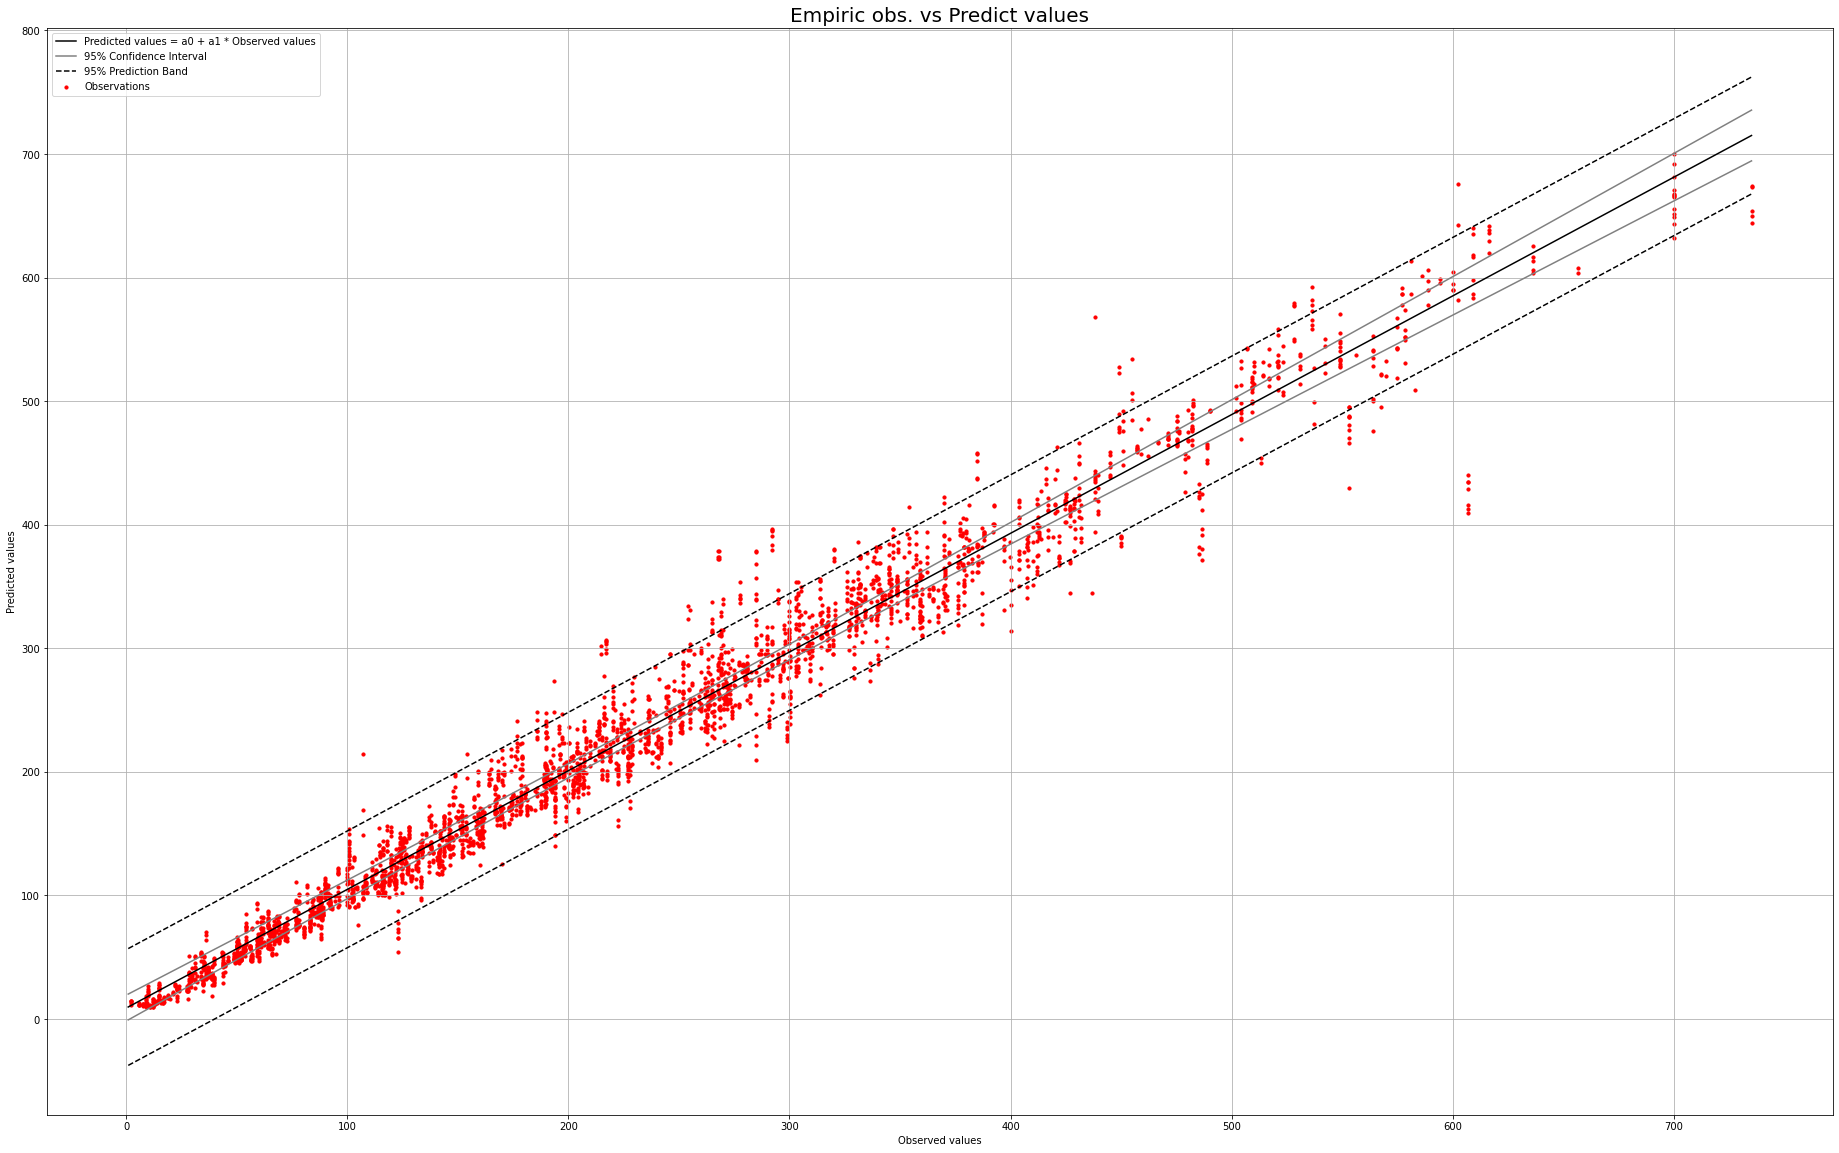

In [75]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(32, 20))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std*7, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std*7, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

In [72]:
print(popt, pcov)

[8.76211653 0.96084341] [[ 5.83544876e-01 -1.82596544e-03]
 [-1.82596544e-03  8.03709545e-06]]


# Uncertainty parameters and confidence intervals

In [ ]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [ ]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t
    print(f"{list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")
print("\n")          

In [ ]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'H_m', 'DBH_cm', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(15,9)})
plt.show()

In [ ]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [ ]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")